# Garmin one run analysis and annotations

- Import your run from [Garmin Connect](https://connect.garmin.com/signin)! "export original" (.zip => .fit)

- This jupyter notebook is the analysis of my run at the ["Haaksbergense Engelse Mijlenloop 2022"](https://connect.garmin.com/modern/activity/8491120962) (activity: 8491120962)

In [2]:
import pandas as pd
import fitdecode #https://fitdecode.readthedocs.io/en/latest/ the Flexible and Interoperable Data Transfer (FIT) protocol is a binary format created by Garmin. fitdecode is a Python library for parsing FIT files.

In [3]:
# COLUMNS_LAPS = ['number', 'start_time', 'total_distance', 'total_elapsed_time','max_speed', 'max_heart_rate', 'avg_heart_rate']

In [14]:
COLUMNS_RECORDS = ['timestamp',
                    'position_lat',
                    'position_long',
                    'distance',
                    'enhanced_speed',
                    'enhanced_altitude',
                    'vertical_oscillation',
                    'stance_time_percent',
                    'stance_time',
                    'vertical_ratio',
                    'stance_time_balance',
                    'step_length',
                    'heart_rate',
                    'cadence',
                    'temperature',
                    'activity_type',
                    'fractional_cadence']

In [15]:
# Corrections
# Timestamp should be +1h
# converter_gps = <latitude or longitude>/(2**32)/360
# cadence is in rpm instead of ppm

In [16]:
garmin_fit_file = '12568414515_ACTIVITY.fit'

In [17]:
data={}
df_lap=pd.DataFrame()
df_record=pd.DataFrame()

with fitdecode.FitReader(garmin_fit_file) as fit_file:
    for frame in fit_file:
        if isinstance(frame, fitdecode.records.FitDataMessage):
            if frame.name == 'lap':
                for field in COLUMNS_LAPS:  
                    if frame.has_field(field):
                        data[field] = frame.get_value(field)
                df_lap = df_lap.append(data,ignore_index=True)
                
            elif frame.name == 'record':
                for field in COLUMNS_RECORDS:  
                    if frame.has_field(field):
                        data[field] = frame.get_value(field)
                df_record = df_record.append(data,ignore_index=True)

<ipython-input-17-0ae103033715>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_record = df_record.append(data,ignore_index=True)
<ipython-input-17-0ae103033715>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_record = df_record.append(data,ignore_index=True)
<ipython-input-17-0ae103033715>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_record = df_record.append(data,ignore_index=True)
<ipython-input-17-0ae103033715>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_record = df_record.append(data,ignore_index=True)
<ipython-input-17-0ae103033715>:18: FutureWarning: The frame.append method is deprecated and will be rem

<ipython-input-17-0ae103033715>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_record = df_record.append(data,ignore_index=True)
<ipython-input-17-0ae103033715>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_record = df_record.append(data,ignore_index=True)
<ipython-input-17-0ae103033715>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_record = df_record.append(data,ignore_index=True)
<ipython-input-17-0ae103033715>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_record = df_record.append(data,ignore_index=True)
<ipython-input-17-0ae103033715>:18: FutureWarning: The frame.append method is deprecated and will be rem

NameError: name 'COLUMNS_LAPS' is not defined

In [18]:
df_record

,timestamp,position_lat,position_long,distance,enhanced_speed,enhanced_altitude,vertical_oscillation,stance_time_percent,stance_time,vertical_ratio,stance_time_balance,step_length,heart_rate,cadence,temperature,activity_type,fractional_cadence
0,2023-11-02 11:31:16+00:00,623296397,81751730,1.08,1.306,28.6,42.7,None,None,4.96,None,754.0,113,51,23,walking,0.0
1,2023-11-02 11:31:17+00:00,623296350,81751853,1.88,1.176,28.6,41.0,None,None,4.96,None,754.0,114,50,23,walking,0.5
2,2023-11-02 11:31:18+00:00,623296378,81752040,2.89,1.176,28.6,76.0,48.5,328.0,8.37,51.15,488.0,114,54,23,running,0.5
3,2023-11-02 11:31:20+00:00,623296294,81752913,7.95,1.418,28.6,81.0,37.25,246.0,22.25,51.15,386.0,117,90,23,running,0.5
4,2023-11-02 11:31:22+00:00,623296457,81754089,14.73,2.099,28.8,76.0,37.5,246.0,8.46,51.25,854.0,120,91,23,running,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2023-11-02 11:36:03+00:00,623297236,81750149,737.25,2.603,30.0,77.0,38.75,257.0,8.46,51.09,863.0,143,90,22,running,0.0
76,2023-11-02 11:36:04+00:00,623297069,81750531,739.91,2.603,30.2,75.0,38.5,256.0,8.37,51.0,861.0,143,90,22,running,0.0
77,2023-11-02 11:36:10+00:00,623296430,81753241,756.08,2.613,30.0,79.0,37.75,253.0,8.59,51.09,897.0,144,90,22,running,0.0
78,2023-11-02 11:36:12+00:00,623296322,81754141,761.22,2.613,30.2,79.0,37.75,253.0,8.68,51.09,893.0,144,90,22,running,0.0


# Other solution

In [9]:
!fitjson -f=record -o out_file.json 12568414515_ACTIVITY.fit

In [10]:
df_json = pd.read_json('out_file.json', lines=False)

In [11]:
df_record = pd.DataFrame.from_dict(df_json['fields'],orient='columns').dropna()

In [12]:
df_record.head()

,fields
2,"[{'name': 'timestamp', 'value': '2023-11-02T11..."
3,"[{'name': 'timestamp', 'value': '2023-11-02T11..."
4,"[{'name': 'timestamp', 'value': '2023-11-02T11..."
6,"[{'name': 'timestamp', 'value': '2023-11-02T11..."
7,"[{'name': 'timestamp', 'value': '2023-11-02T11..."


In [13]:
df_record['fields'][2]

[{'name': 'timestamp',
  'value': '2023-11-02T11:31:16+00:00',
  'units': '',
  'def_num': 253,
  'raw_value': 1067859076},
 {'name': 'position_lat',
  'value': 52.24410046823323,
  'units': 'deg',
  'def_num': 0,
  'raw_value': 623296397},
 {'name': 'position_long',
  'value': 6.852350849658251,
  'units': 'deg',
  'def_num': 1,
  'raw_value': 81751730},
 {'name': 'distance',
  'value': 0.00108,
  'units': 'km',
  'def_num': 5,
  'raw_value': 108},
 {'name': 'enhanced_speed',
  'value': 4.7016,
  'units': 'km/h',
  'def_num': 73,
  'raw_value': 1306},
 {'name': 'enhanced_altitude',
  'value': 28.600000000000023,
  'units': 'm',
  'def_num': 78,
  'raw_value': 2643},
 {'name': 'vertical_oscillation',
  'value': 42.7,
  'units': 'mm',
  'def_num': 39,
  'raw_value': 427},
 {'name': 'stance_time_percent',
  'value': None,
  'units': 'percent',
  'def_num': 40,
  'raw_value': None},
 {'name': 'stance_time',
  'value': None,
  'units': 'ms',
  'def_num': 41,
  'raw_value': None},
 {'name':

## Analysis

In [22]:
df_record.head()

,timestamp,position_lat,position_long,distance,enhanced_speed,enhanced_altitude,vertical_oscillation,stance_time_percent,stance_time,vertical_ratio,stance_time_balance,step_length,heart_rate,cadence,temperature,activity_type,fractional_cadence
0,2023-11-02 11:31:16+00:00,623296397,81751730,1.08,1.306,28.6,42.7,None,None,4.96,None,754.0,113,51,23,walking,0.0
1,2023-11-02 11:31:17+00:00,623296350,81751853,1.88,1.176,28.6,41.0,None,None,4.96,None,754.0,114,50,23,walking,0.5
2,2023-11-02 11:31:18+00:00,623296378,81752040,2.89,1.176,28.6,76.0,48.5,328.0,8.37,51.15,488.0,114,54,23,running,0.5
3,2023-11-02 11:31:20+00:00,623296294,81752913,7.95,1.418,28.6,81.0,37.25,246.0,22.25,51.15,386.0,117,90,23,running,0.5
4,2023-11-02 11:31:22+00:00,623296457,81754089,14.73,2.099,28.8,76.0,37.5,246.0,8.46,51.25,854.0,120,91,23,running,0.0


<AxesSubplot:>

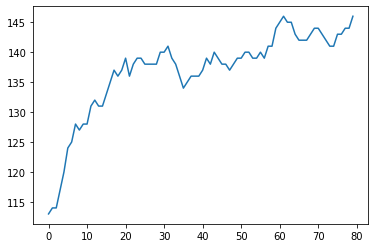

In [24]:
df_record['heart_rate'].plot()

<AxesSubplot:>

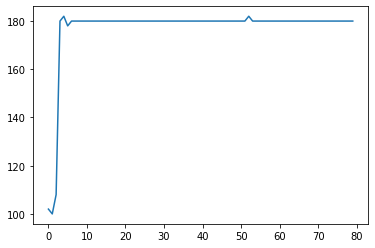

In [27]:
(df_record['cadence']*2).plot()